In [1]:
import numpy as np

In [2]:
np.bool

/tmp/ipykernel_1983355/3526611434.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.bool


bool

In [5]:
np.__version__

'1.23.5'

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
import tensorflow as tf
from tqdm import trange
from matplotlib import pyplot as plt
from functions import *
import os

%load_ext autoreload
%autoreload 2
plt.rcParams.update({'font.size': 20})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
d = 20
q  = np.random.normal(0,1, int(d+ (d-1)*d/2))
n_samples = 10000
n_thermalize = 5000
print(q)

[-0.23257035 -0.10930036 -0.24198541  1.52742831 -0.25760828 -1.58319217
  0.04241945 -0.69722552  0.65054471  0.9821771  -1.10942807 -0.1466015
 -0.50287841 -0.18760087  0.5693614  -0.98209885 -0.76034822 -1.80742763
  0.97410743 -1.59776327  0.77292094  0.60790494 -1.27632179 -0.26310751
 -0.38740919  0.78939339  0.02160396  0.84758627  0.50582907  0.1599137
 -0.20945662  2.02429716 -1.54400961 -0.0871927   0.89301638 -0.46912154
  0.10611561 -0.2818014  -1.01951162 -0.67712904  0.97996236 -0.38889083
 -1.65619025  0.23043421  2.59486769 -1.18962399  0.45150801  0.59777663
  0.37827939 -0.07555382  2.14939773 -0.13496274 -0.79993127 -0.82972827
  0.3577301   1.9021441   0.58256149 -1.25883806 -1.41831827 -0.16346906
 -1.227446   -0.45773275 -0.0086124   1.91038998  1.72596798 -0.89977483
 -1.25231325  2.81368458 -0.02549978 -1.5718863  -1.33709238  1.03346824
 -0.88580391  1.75917495  0.09936625  0.93480177  1.35178836  2.61672964
  0.66234181  0.13248626 -1.19104908  0.61452201  1.1

In [9]:


h,J = get_hJ(q,d)
h = tf.convert_to_tensor(h,dtype=tf.float64)
J= tf.convert_to_tensor(J,dtype=tf.float64)

# n_samples = 10000
x = np.random.choice([-1,1], (n_samples,d))
x = tf.convert_to_tensor(x,dtype=tf.float64)

for k in range(5):
    x, energy_history = thermalize(x,J,h, NumSteps=n_thermalize , crange =range)

x, f_model = compute_f(x,J,h,StepsTherm=10,NumSteps=50, crange=lambda NumSteps, dtype: trange(NumSteps))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2024-09-16 17:17:11.841619: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-09-16 17:17:11.841803: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-09-16 17:17:11.841811: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2024-09-16 17:17:11.841823: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (adroit-h11n2): /proc/driver/nvidia/version does not exist
2024-09-16 17:17:11.842038: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebu

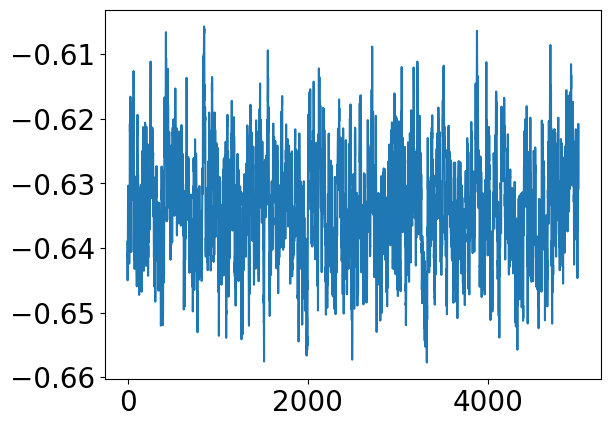

In [10]:
plt.plot(energy_history)

In [11]:
f_model

<tf.Tensor: shape=(210,), dtype=float64, numpy=
array([ 9.40000e-03,  1.48360e-02,  2.52400e-03, -8.57320e-02,
        1.99360e-02,  7.40480e-02,  3.22400e-03,  4.00840e-02,
       -1.86480e-02, -5.68160e-02,  4.54520e-02,  1.57480e-02,
        2.18000e-02,  2.46120e-02, -2.71000e-02,  4.73600e-02,
        4.36200e-02,  7.67000e-02, -5.35320e-02,  9.12560e-02,
       -5.11160e-02, -4.71640e-02,  5.91000e-02, -1.85600e-03,
        1.33200e-02, -6.03680e-02,  1.84920e-02, -4.90240e-02,
       -2.62320e-02,  4.78800e-03,  4.73200e-03, -1.04656e-01,
        7.61640e-02,  6.66000e-03, -3.86320e-02,  2.67720e-02,
       -2.72400e-03,  3.32400e-03,  3.84240e-02,  5.56000e-02,
       -3.35840e-02,  4.60360e-02,  7.81240e-02,  1.52200e-02,
       -1.20664e-01,  6.29640e-02, -1.75240e-02, -4.58480e-02,
        9.71200e-03,  3.16680e-02, -9.30880e-02,  1.01840e-02,
        3.29880e-02,  2.97440e-02, -2.47200e-03, -6.70800e-02,
       -1.06440e-02,  5.09680e-02,  8.76840e-02,  1.62600e-02,
       

In [13]:
folder_bin = ''
label='a'

np.savetxt(f'{folder_bin}f_data_{d}_{label}.dat', f_model)

In [ ]:
# eseguire da riga di comando

In [24]:
q_found = np.loadtxt(f'{folder_bin}q_{d}_{label}.dat')

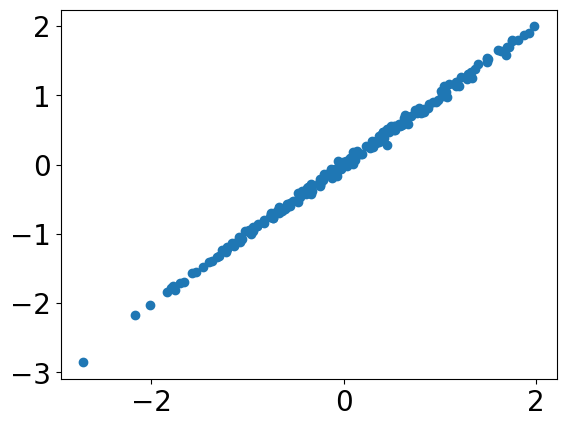

In [25]:
plt.scatter(q, q_found)